In [721]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans



reg_season_detailed_pd = pd.read_csv('data/RegularSeasonDetailedResults.csv')
reg_season_detailed_2018_pd = pd.read_csv('data/RegularSeasonDetailedResults_Prelim2018.csv')
seasons_pd = pd.read_csv('data/Seasons.csv')
teams_pd = pd.read_csv('data/Teams.csv')
teamList = teams_pd['Team_Name'].tolist()
tourney_compact_pd = pd.read_csv('data/TourneyCompactResults.csv')
tourney_detailed_pd = pd.read_csv('data/TourneyDetailedResults.csv')
tourney_seeds_pd = pd.read_csv('data/TourneySeeds.csv')
tourney_seeds_pd.columns = ['Season', 'Seed', 'Team_Id']
tourney_slots_pd = pd.read_csv('data/TourneySlots.csv')
ncaa_tourney_compact_pd = pd.read_csv('data/NCAATourneyCompactResults.csv')
teams_pd_2 = pd.read_csv('data/Teams-2.csv')
reg_season_detailed_pd.columns
print(tourney_seeds_pd)

      Season  Seed  Team_Id
0       1985   W01     1207
1       1985   W02     1210
2       1985   W03     1228
3       1985   W04     1260
4       1985   W05     1374
5       1985   W06     1208
6       1985   W07     1393
7       1985   W08     1396
8       1985   W09     1439
9       1985   W10     1177
10      1985   W11     1455
11      1985   W12     1330
12      1985   W13     1233
13      1985   W14     1318
14      1985   W15     1273
15      1985   W16     1250
16      1985   X01     1385
17      1985   X02     1433
18      1985   X03     1301
19      1985   X04     1424
20      1985   X05     1449
21      1985   X06     1409
22      1985   X07     1104
23      1985   X08     1234
24      1985   X09     1116
25      1985   X10     1112
26      1985   X11     1431
27      1985   X12     1246
28      1985   X13     1361
29      1985   X14     1305
...      ...   ...      ...
2120    2017   Y05     1235
2121    2017   Y06     1166
2122    2017   Y07     1276
2123    2017   Y08  

In [635]:
reg_season_detailed_pd['Wfg%'] = reg_season_detailed_pd['Wfgm'] / reg_season_detailed_pd['Wfga']
reg_season_detailed_pd['Lfg%'] = reg_season_detailed_pd['Lfgm'] / reg_season_detailed_pd['Lfga']
reg_season_detailed_pd['Wfg%3'] = reg_season_detailed_pd['Wfgm3'] / reg_season_detailed_pd['Wfga3']
reg_season_detailed_pd['Lfg%3'] = reg_season_detailed_pd['Lfgm3'] / reg_season_detailed_pd['Lfga3']
reg_season_detailed_pd['Wft%'] = reg_season_detailed_pd['Wftm'] / reg_season_detailed_pd['Wfta']
reg_season_detailed_pd['Lft%'] = reg_season_detailed_pd['Lftm'] / reg_season_detailed_pd['Lfta']
reg_season_detailed_pd['Wfga2'] = reg_season_detailed_pd['Wfga'] - reg_season_detailed_pd['Wfga3']
reg_season_detailed_pd['Lfga2'] = reg_season_detailed_pd['Lfga'] - reg_season_detailed_pd['Lfga3']
reg_season_detailed_pd['Wfgm2'] = reg_season_detailed_pd['Wfgm'] - reg_season_detailed_pd['Wfgm3']
reg_season_detailed_pd['Lfgm2'] = reg_season_detailed_pd['Lfgm'] - reg_season_detailed_pd['Lfgm3']
reg_season_detailed_pd['Wfg%2'] = reg_season_detailed_pd['Wfgm2'] / reg_season_detailed_pd['Wfga2']
reg_season_detailed_pd['Lfg%2'] = reg_season_detailed_pd['Lfgm2'] / reg_season_detailed_pd['Lfga2']

In [636]:
reg_season_detailed_2017_pd = reg_season_detailed_pd[reg_season_detailed_pd['Season'] == 2017]
print(reg_season_detailed_2017_pd.groupby('Wteam').count()['Season'])

Wteam
1101     9
1102    10
1103    25
1104    19
1105     2
1106     7
1107    20
1108    15
1110     8
1111     7
1112    30
1113    15
1114    13
1115     6
1116    25
1117    19
1119    12
1120    18
1122     9
1123    20
1124    24
1125    21
1126     8
1127     9
1129    18
1130     9
1131    17
1132    12
1133    12
1135    11
        ..
1433    26
1434    23
1435    19
1436    28
1437    31
1438    22
1439    22
1440     4
1441     7
1442     6
1443    15
1444    15
1447    15
1448    19
1449     9
1450    12
1451    17
1452    26
1453    16
1454    10
1455    29
1456    15
1457    24
1458    25
1459    13
1460    18
1461    16
1462    21
1463    17
1464    11
Name: Season, Length: 351, dtype: int64


    Season     Daynum        Wteam     Wscore        Lteam     Lscore  \
0     2003  74.808709  1285.591854  75.795061  1281.750867  63.756932   
1     2004  75.335156  1285.931306  74.971122  1280.900678  62.990155   
2     2005  75.042567  1286.067166  74.693690  1282.088770  62.635294   
3     2006  74.712634  1283.769182  74.587555  1285.425478  62.666597   
4     2007  71.676780  1286.476700  74.829467  1283.896887  62.761650   
5     2008  68.392020  1288.741817  74.962425  1281.907418  62.755375   
6     2009  70.963612  1287.680511  74.033721  1281.312250  61.980377   
7     2010  70.741212  1289.607638  74.652480  1279.997910  62.484325   
8     2011  70.881243  1285.244758  74.374190  1283.078727  62.470644   
9     2012  70.745479  1286.596802  73.379973  1283.055778  61.415953   
10    2013  68.058647  1284.684211  72.840789  1285.594361  60.908083   
11    2014  68.882507  1288.116561  76.101268  1280.580940  64.452070   
12    2015  70.742249  1288.073963  72.680799  1279

Text(0,0.5,'fg%')

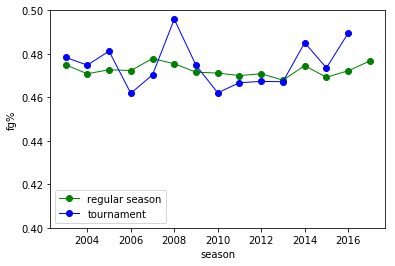

In [872]:
season_groupby = reg_season_detailed_pd.groupby('Season', as_index=False).mean()
tournament_groupby = tourney_detailed_pd.groupby('Season', as_index=False). mean()
print(season_groupby)
print(reg_season_detailed_2017_pd)
plt.figure(1)
plt.ylim(0.4, 0.5)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='regular season', color='green', lw=1, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm']/tournament_groupby['Wfga'], label='tournament', color='blue', lw=1, marker='o')
# plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser regular season', color='red', lw=1, marker='o')
# plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm']/tournament_groupby['Lfga'], label='winner tournament', color='orange', lw=1, marker='o')
plt.legend(loc='best')
# plt.title('Fields Goal Percentage by Season')
plt.xlabel('season')
plt.ylabel('fg%')

In [637]:
# try on point differentials, rather than separating by wins and looses 
reg_season_detailed_2017_pd = reg_season_detailed_pd[reg_season_detailed_pd['Season'] == 2017]
wins = reg_season_detailed_2017_pd.groupby('Wteam', as_index=False).count()
wins = wins[['Wteam','Season']]
wins.columns = ['team', 'wins']

loss = reg_season_detailed_2017_pd.groupby('Lteam', as_index=False).count()
loss = loss[['Lteam','Season']]
loss.columns = ['team', 'losses']

winloss = pd.merge(wins, loss)
winloss['win%'] = winloss['wins'] / (winloss['wins'] + winloss['losses'])

In [638]:
# bad way of doing thing
# win_team = reg_season_detailed_2017_pd.groupby(['Wteam'], as_index=False).mean()
# win_season_stats = []
# for index, row in win_team.iterrows():
#     win_season_stats.append([row['Wteam'], row['Wscore'], row['Lscore'], row['Wfgm'] / row['Wfga'] * 100, 
#                          row['Wfga'], row['Wfga3'], row['Wfgm3'] / row['Wfga3'] * 100, 
#                          row['Wftm'] / row['Wfta'] * 100, row['Wor'], row['Wdr'],
#                          row['Wast'], row['Wto'], row['Wstl'], row['Wblk'], row['Wpf']])
# win_season_stats = pd.DataFrame(win_season_stats)
# win_season_stats.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
#                        'pf']

# lose_team = reg_season_detailed_2017_pd.groupby(['Lteam'], as_index=False).mean()
# lose_season_stats = []
# for index, row in lose_team.iterrows():
#     lose_season_stats.append([row['Lteam'], row['Lscore'], row['Wscore'], row['Lfgm'] / row['Lfga'] * 100, 
#                          row['Lfga'], row['Lfga3'], row['Lfgm3'] / row['Lfga3'] * 100, 
#                          row['Lftm'] / row['Lfta'] * 100, row['Lor'], row['Ldr'],
#                          row['Last'], row['Lto'], row['Lstl'], row['Lblk'], row['Lpf']])

# lose_season_stats = pd.DataFrame(lose_season_stats)
# lose_season_stats.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
#                        'pf']
# season_stats = win_season_stats.append(lose_season_stats)
# season_stats = season_stats.groupby(['team'], as_index=False).mean()
# season_stats.shape

In [639]:
winning_df = reg_season_detailed_2017_pd[['Wteam', 'Wscore', 'Lscore', 'Wfgm', 'Wfga', 'Wfg%', 'Wfga3', 'Wfgm3', 'Wfg%3',
                                          'Wfga2', 'Wfgm2', 'Wfg%2',
                                          'Wftm', 'Wfta', 'Wft%', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']]
losing_df = reg_season_detailed_2017_pd[['Lteam', 'Lscore', 'Wscore', 'Lfgm', 'Lfga', 'Lfg%', 'Lfga3', 'Lfgm3', 'Lfg%3',
                                         'Lfga2', 'Lfgm2', 'Lfg%2',
                                         'Lftm', 'Lfta', 'Lft%', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']]
winning_df.columns = ['team', 'for', 'against', 'fgm', 'fga', 'fg%', 'fga3', 'fgm3', 'fg%3', 
                      'fga2', 'fgm2', 'fg%2', 'ftm', 'fta', 'ft%',
                      'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
losing_df.columns = ['team', 'for', 'against', 'fgm', 'fga', 'fg%', 'fga3', 'fgm3', 'fg%3', 
                     'fga2', 'fgm2', 'fg%2', 'ftm', 'fta', 'ft%',
                     'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
season_stats_df = winning_df
season_stats = season_stats_df.groupby(['team'], as_index=False).mean()
season_stats = pd.merge(season_stats, winloss)
season_stats['diff'] = season_stats['for'] - season_stats['against']
season_stats['r%'] = season_stats['or'] / season_stats['dr']
print(season_stats)

     team        for    against        fgm        fga       fg%       fga3  \
0    1101  74.333333  69.666667  24.000000  49.555556  0.485328  18.222222   
1    1102  80.100000  66.700000  26.000000  54.800000  0.476577  20.200000   
2    1103  79.720000  69.840000  26.840000  55.240000  0.487707  26.840000   
3    1104  72.947368  59.000000  24.578947  56.105263  0.438559  21.157895   
4    1105  83.000000  75.000000  27.500000  53.000000  0.518538  19.500000   
5    1106  75.714286  68.000000  25.142857  57.714286  0.440409  21.714286   
6    1107  78.100000  64.300000  27.300000  56.350000  0.484870  14.950000   
7    1108  73.800000  62.933333  25.933333  55.600000  0.468190  20.533333   
8    1110  66.500000  58.625000  24.750000  49.500000  0.506110  13.500000   
9    1111  76.857143  67.000000  24.857143  58.142857  0.429771  24.428571   
10   1112  77.866667  64.166667  26.533333  55.266667  0.480600  17.400000   
11   1113  89.466667  77.066667  29.066667  60.666667  0.477706 

In [835]:
# perform clustering 
%matplotlib inline

num_clusters = 12 #best num

num_clusters = 12

# stats to cluster on 
feature_columns = ['for', 'against', 'fga', 'fg%', 'fga3', 'fg%3', 'fta', 'ft%',
                      'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']

cluster_columns = ['fg%3', 'fg%2', 'ft%', 'blk', 'or', 'dr', 'pf'] #best performing model

cluster_columns = cluster_columns

to_cluster = season_stats[cluster_columns]

# normalize the stats 
x = to_cluster.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled)
scaled_df.columns = cluster_columns

# fit kmeans using to_cluster (non-normalized) or scaled_df(normalized)
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(to_cluster)

# extract data about clusters
cluster_map = pd.DataFrame()
cluster_map['Team_Id'] = season_stats.team.values
cluster_map['cluster'] = kmeans.labels_
pairs = []

#create matrix for cluster vs cluster percentages
for i in range(0,num_clusters):
    for j in range(0,num_clusters):
        if(i != j):
            pairs.append([i, j])

percentages = np.zeros((num_clusters,num_clusters))
for pair in pairs:
    cluster_1_wins = reg_season_detailed_2017_pd[
        reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == pair[0]].Team_Id) & 
        reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == pair[1]].Team_Id)
    ]
    cluster_2_wins = reg_season_detailed_2017_pd[
        reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == pair[1]].Team_Id) & 
        reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == pair[0]].Team_Id)
    ]
    percentages[pair[0], pair[1]] = cluster_1_wins.shape[0] / (cluster_1_wins.shape[0] + cluster_2_wins.shape[0])
    percentages[pair[1], pair[0]] = cluster_2_wins.shape[0] / (cluster_1_wins.shape[0] + cluster_2_wins.shape[0])

# get cluster centroids
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = cluster_columns
centers['cluster'] = ['cluster ' + str(i) for i in centers.index]
centers.set_index(['cluster'])

# get list of teams in each 
mm_teams = tourney_seeds_pd[tourney_seeds_pd['Season'] == 2017].Team_Id.values
mm_team_clusters = cluster_map[cluster_map['Team_Id'].isin(mm_teams)]
cluster_seeds = pd.merge(mm_team_clusters, tourney_seeds_pd[tourney_seeds_pd['Season'] == 2017])
team_cluster_seeds = pd.merge(cluster_seeds, teams_pd)
test = team_cluster_seeds.groupby('cluster')['Team_Name'].apply(lambda x: "%s" % ', '.join(x))
print(cluster_map.groupby(['cluster']).count())

         Team_Id
cluster         
0             34
1             48
2             34
3             20
4             36
5             25
6             24
7             20
8             34
9             12
10            32
11            32


In [836]:
# test on 2017 tournament data using cluster vs cluster performance 
tourney_games = ncaa_tourney_compact_pd[ncaa_tourney_compact_pd['Season'] == 2017]
correct_games = 0
incorrect_games = 0
unknown_games = 0
print(cluster_map)
print(tourney_games.shape)
for index, game in tourney_games.iterrows():
    w_team_cluster = cluster_map[cluster_map['Team_Id'] == game['WTeamID']].cluster.values[0]
    l_team_cluster = cluster_map[cluster_map['Team_Id'] == game['LTeamID']].cluster.values[0]
    if percentages[w_team_cluster, l_team_cluster] >= 0.5:
        correct_games = correct_games + 1
    elif percentages [w_team_cluster, l_team_cluster] > 0:
        incorrect_games = incorrect_games + 1
    
print (correct_games, incorrect_games)

     Team_Id  cluster
0       1101       11
1       1102        8
2       1103       10
3       1104        2
4       1105        9
5       1106        4
6       1107       10
7       1108        1
8       1110        7
9       1111        9
10      1112        1
11      1113        1
12      1114       10
13      1115       10
14      1116        4
15      1117        1
16      1119        0
17      1120        4
18      1122        1
19      1123        0
20      1124        6
21      1125        5
22      1126       11
23      1127        5
24      1129       11
25      1130        0
26      1131        1
27      1132        1
28      1133        2
29      1135       11
..       ...      ...
321     1433       11
322     1434        8
323     1435        5
324     1436        3
325     1437        5
326     1438        3
327     1439        5
328     1440       11
329     1441        9
330     1442        0
331     1443        5
332     1444        6
333     1447        4
334     14

In [852]:
# logreg model 

# construct feature matrix, and y vector 
# feature_columns = ['for', 'against', 'fga', 'fg%', 'fga3', 'fg%3', 'fga2', 'fg%2', 'fta', 'ft%',
#                       'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']

feature_columns = ['for', 'against', 
                   'fg%', 'fg%3', 'fg%2', 'ft%',
                   'or', 'dr',
                   'ast', 'to', 'stl', 'blk', 'pf'] # best cols

feature_columns = ['for', 'against', 
                   'fg%', 'fg%3', 'fg%2', 'ft%',
                   'or', 'dr',
                   'ast', 'to', 'stl', 'blk', 'pf']

team_feature_columns = []
for col in feature_columns:
    team_feature_columns.append(col + '1')
for col in feature_columns:
    team_feature_columns.append(col + '2')
feature_matrix = season_stats[feature_columns]
cluster_feature_columns = []
for pair in pairs:
    cluster_feature_columns.append(",".join(str(x) for x in pair))

full_feature_columns = team_feature_columns + cluster_feature_columns
print(full_feature_columns)
outcome = []
feature_matrix = []
diff_feature_matrix = []

for index,game in reg_season_detailed_2017_pd.iterrows():
    
    wteam_id = game.Wteam
    lteam_id = game.Lteam
    wteam_cluster = cluster_map[cluster_map['Team_Id'] == wteam_id].cluster.values[0]
    lteam_cluster = cluster_map[cluster_map['Team_Id'] == lteam_id].cluster.values[0]
    wteam_features = season_stats[season_stats['team'] == wteam_id][feature_columns].values
    lteam_features = season_stats[season_stats['team'] == lteam_id][feature_columns].values
    
    row1_features = np.append(wteam_features,lteam_features)
    row1_cluster = np.zeros((len(cluster_feature_columns), 1))
    cluster_str1 = str(wteam_cluster) + "," + str(lteam_cluster)
    if (wteam_cluster != lteam_cluster):
        row1_cluster[cluster_feature_columns.index(cluster_str1)] = 1
    row1_features = np.append(row1_features, row1_cluster)
    feature_matrix.append(row1_features)
    diff_feature_matrix.append(np.subtract(wteam_features,lteam_features)[0])
    outcome.append(1)
    
    row2_features = np.append(lteam_features,wteam_features)
    row2_cluster = np.zeros((len(cluster_feature_columns), 1))
    cluster_str2 = str(lteam_cluster) + "," + str(wteam_cluster)
    if (wteam_cluster != lteam_cluster):
        row2_cluster[cluster_feature_columns.index(cluster_str2)] = 1
    row2_features = np.append(row2_features, row2_cluster)
    feature_matrix.append(row2_features)
    diff_feature_matrix.append(np.subtract(lteam_features,wteam_features)[0])
    outcome.append(0)

['for1', 'against1', 'fg%1', 'fg%31', 'fg%21', 'ft%1', 'or1', 'dr1', 'ast1', 'to1', 'stl1', 'blk1', 'pf1', 'for2', 'against2', 'fg%2', 'fg%32', 'fg%22', 'ft%2', 'or2', 'dr2', 'ast2', 'to2', 'stl2', 'blk2', 'pf2', '0,1', '0,2', '0,3', '0,4', '0,5', '0,6', '0,7', '0,8', '0,9', '0,10', '0,11', '1,0', '1,2', '1,3', '1,4', '1,5', '1,6', '1,7', '1,8', '1,9', '1,10', '1,11', '2,0', '2,1', '2,3', '2,4', '2,5', '2,6', '2,7', '2,8', '2,9', '2,10', '2,11', '3,0', '3,1', '3,2', '3,4', '3,5', '3,6', '3,7', '3,8', '3,9', '3,10', '3,11', '4,0', '4,1', '4,2', '4,3', '4,5', '4,6', '4,7', '4,8', '4,9', '4,10', '4,11', '5,0', '5,1', '5,2', '5,3', '5,4', '5,6', '5,7', '5,8', '5,9', '5,10', '5,11', '6,0', '6,1', '6,2', '6,3', '6,4', '6,5', '6,7', '6,8', '6,9', '6,10', '6,11', '7,0', '7,1', '7,2', '7,3', '7,4', '7,5', '7,6', '7,8', '7,9', '7,10', '7,11', '8,0', '8,1', '8,2', '8,3', '8,4', '8,5', '8,6', '8,7', '8,9', '8,10', '8,11', '9,0', '9,1', '9,2', '9,3', '9,4', '9,5', '9,6', '9,7', '9,8', '9,10', '9,11

In [853]:
test_outcome = []
test_feature_matrix = []
diff_test_feature_matrix = []

tourney_games = ncaa_tourney_compact_pd[ncaa_tourney_compact_pd['Season'] == 2017]

for game in tourney_games.itertuples():
    wteam_id = game.WTeamID
    lteam_id = game.LTeamID
    team_cluster = cluster_map[cluster_map['Team_Id'] == wteam_id].cluster.values[0]
    lteam_cluster = cluster_map[cluster_map['Team_Id'] == lteam_id].cluster.values[0]
    wteam_features = season_stats[season_stats['team'] == wteam_id][feature_columns].values
    lteam_features = season_stats[season_stats['team'] == lteam_id][feature_columns].values
    
    row1_features = np.append(wteam_features,lteam_features)
    row1_cluster = np.zeros((len(cluster_feature_columns), 1))
    cluster_str1 = str(wteam_cluster) + "," + str(lteam_cluster)
    if (wteam_cluster != lteam_cluster):
        row1_cluster[cluster_feature_columns.index(cluster_str1)] = 1
    row1_features = np.append(row1_features, row1_cluster)
    test_feature_matrix.append(row1_features)
    diff_test_feature_matrix.append(np.subtract(wteam_features,lteam_features)[0])
    test_outcome.append(1)

In [854]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
logreg = LogisticRegression()
rfe = RFE(logreg, 1000)
rfe = rfe.fit(feature_matrix,outcome)
print(rfe.support_)
print(rfe.ranking_)
features_rfe = []; 
for i in range(len(rfe.support_)):
    if np.any(rfe.support_[i]):
        features_rfe.append(full_feature_columns[i])

print(features_rfe)
#features_rfe = pd.DataFrame(rfe.support_[0])
#features_rfe.columns = full_feature_columns

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [857]:
custom_columns = ['for', 'against', 'fg%', 'fg%3', 'fg%2', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
print(len(features_rfe))
features_df = pd.DataFrame(feature_matrix)
features_df.columns = full_feature_columns
sub_features_matrix = features_df[team_feature_columns].values

test_feature_pd = pd.DataFrame(test_feature_matrix)
test_feature_pd.columns = full_feature_columns
sub_test_feature_matrix = test_feature_pd[team_feature_columns].values

# diff_features_df = pd.DataFrame(diff_feature_matrix)
# diff_features_df.columns = feature_columns
# diff_sub_features_matrix = diff_features_df[feature_columns].values

# diff_test_feature_pd = pd.DataFrame(diff_test_feature_matrix)
# diff_test_feature_pd.columns = feature_columns
# diff_sub_test_feature_matrix = diff_test_feature_pd[feature_columns].values

#from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression



x_train, x_test, y_train, y_test = train_test_split(sub_features_matrix, outcome, test_size=0.33, random_state=42)
logreg = LogisticRegression(C=1000, penalty='l2')
logreg.fit(sub_features_matrix, outcome)
#y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.10f}'.format(logreg.score(sub_test_feature_matrix, test_outcome)))

158
Accuracy of logistic regression classifier on test set: 0.6417910448


In [826]:
matchups = pd.read_csv('data/SampleSubmission.csv')
d = ['for', 'against', 'fg%', 'fg%3', 'fg%2', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
# d = ['for', 'against', 'fg%', 'fg%3', 'fg%2', 'or', 'dr', 'to', 'stl', 'blk', 'pf']
c = []
for pair in cluster_feature_columns:
    if pair in features_rfe:
        c.append(pair)

list_matchups = []
for game in matchups.itertuples():
    year,team1_id,team2_id = game.Id.split("_")
    team1_cluster = cluster_map[cluster_map['Team_Id'] == int(team1_id)].cluster.values[0]
    team2_cluster = cluster_map[cluster_map['Team_Id'] == int(team2_id)].cluster.values[0]
    team1_features = season_stats[season_stats['team'] == int(team1_id)][d].values
    team2_features = season_stats[season_stats['team'] == int(team2_id)][d].values
    
    row_features = np.append(team1_features,team2_features)
    row_cluster = np.zeros((len(c), 1))
    cluster_str = str(team1_cluster) + "," + str(team2_cluster)
    if (team1_cluster != team2_cluster and cluster_str in c):
        row_cluster[c.index(cluster_str)] = 1
    row_features = np.append(row_features, row_cluster)
    prob = logreg.predict_proba([row_features])[0][1]
    list_matchups.append([game.Id, prob])

submission = pd.DataFrame(list_matchups, columns=matchups.columns)
submission.to_csv('data/Submission.csv', index=False)

In [827]:
logreg.predict(sub_test_feature_matrix)
proba = logreg.predict_proba(sub_test_feature_matrix)
diff_arr = logreg.predict(sub_test_feature_matrix) - test_outcome
y_pred_proba = []
for index, game in enumerate(tourney_games.itertuples()):
    print(index)
    if diff_arr[index] != 0:
        team_1 = teams_pd[teams_pd['Team_Id'] == game.WTeamID]['Team_Name'].values[0]
        team_2 = teams_pd[teams_pd['Team_Id'] == game.LTeamID]['Team_Name'].values[0]
        print(team_1, team_2, logreg.predict_proba(sub_test_feature_matrix)[index])
    y_pred_proba.append(proba[index][0])
    
print(tourney_games.size)

0
1
2
UC Davis NC Central [ 0.70001312  0.29998688]
3
4
5
6
7
8
9
10
MTSU Minnesota [ 0.5259378  0.4740622]
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
Michigan St Miami FL [ 0.51413445  0.48586555]
29
30
31
32
South Carolina Marquette [ 0.50156145  0.49843855]
33
34
USC SMU [ 0.60091981  0.39908019]
35
36
Arizona St Mary's CA [ 0.78808937  0.21191063]
37
Butler MTSU [ 0.53898562  0.46101438]
38
39
40
41
42
43
Xavier Florida St [ 0.76784294  0.23215706]
44
45
46
47
48
49
50
South Carolina Duke [ 0.61544077  0.38455923]
51
52
53
Kansas Purdue [ 0.72750184  0.27249816]
54
55
Xavier Arizona [ 0.6102544  0.3897456]
56
57
58
59
60
61
62
63
South Carolina Florida [ 0.59137233  0.40862767]
64
65
66
North Carolina Gonzaga [ 0.61072693  0.38927307]
536


In [814]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(max_depth=1000, n_estimators=1000)
# Train the model on training data
x_train, x_test, y_train, y_test = train_test_split(sub_features_matrix, outcome, test_size=0.33, random_state=42)
rf.fit(sub_features_matrix, outcome)
y_pred = rf.predict(x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(sub_test_feature_matrix, test_outcome)))

Accuracy of random forest classifier on test set: 0.61


In [15]:
diff_arr = rf.predict(sub_test_feature_matrix) - test_outcome
for index, game in enumerate(tourney_games.itertuples()):
    if diff_arr[index] != 0:
        team_1 = teams_pd[teams_pd['Team_Id'] == game.WTeamID]['Team_Name'].values[0]
        team_2 = teams_pd[teams_pd['Team_Id'] == game.LTeamID]['Team_Name'].values[0]
        print(team_1, team_2)

NameError: name 'sub_test_feature_matrix' is not defined

In [813]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=500)
x_train, x_test, y_train, y_test = train_test_split(sub_features_matrix, outcome, test_size=0.33, random_state=42)
neigh.fit(sub_features_matrix, outcome)
y_pred = rf.predict(x_test)
print('Accuracy of knn classifier on test set: {:.2f}'.format(neigh.score(sub_test_feature_matrix, test_outcome)))

Accuracy of knn classifier on test set: 0.67


In [18]:
coef_df = pd.DataFrame(logreg.coef_)
coef_df.columns = full_feature_columns
print(coef_df.head())

NameError: name 'logreg' is not defined

In [19]:
scaled_df.columns = ['score', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']

data_label = scaled_df.join(cluster_map)
print(data_label.shape)
plt.figure(0)
plt.scatter(season_stats['team'], season_stats['score'])
plt.figure(1)
plt.scatter(data_label['score'], data_label['fg%'], c=data_label.cluster)
plt.xlabel('score')
plt.ylabel('fga')

ValueError: Length mismatch: Expected axis has 4 elements, new values have 13 elements

In [20]:
reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot,Wfgm,Wfga,Wfgm3,...,Lto,Lstl,Lblk,Lpf,Wfg%,Lfg%,Wfg%3,Lfg%3,Wft%,Lft%
0,2003,74.808709,1285.591854,75.795061,1281.750867,63.756932,0.061308,26.299393,55.367851,6.695624,...,15.602903,6.507582,2.768198,20.413128,0.476635,0.403678,0.384372,0.309846,0.708467,0.671526
1,2004,75.335156,1285.931306,74.971122,1280.900678,62.990155,0.071319,25.928681,55.069350,6.708160,...,15.654999,6.493984,2.741413,20.322468,0.472597,0.402428,0.381383,0.308216,0.702918,0.664356
2,2005,75.042567,1286.067166,74.693690,1282.088770,62.635294,0.066524,25.975187,54.949305,6.769840,...,15.490481,6.509733,2.806203,19.884492,0.474548,0.401843,0.381509,0.309263,0.700028,0.667886
3,2006,74.712634,1283.769182,74.587555,1285.425478,62.666597,0.073996,25.920538,54.881228,6.845281,...,15.521127,6.368089,2.836872,19.679210,0.473969,0.403535,0.382577,0.312527,0.707202,0.667626
4,2007,71.676780,1286.476700,74.829467,1283.896887,62.761650,0.067618,25.896887,54.196907,7.043228,...,15.218917,6.225858,2.760658,19.985524,0.479336,0.403821,0.386768,0.309334,0.703628,0.670486
5,2008,68.392020,1288.741817,74.962425,1281.907418,62.755375,0.072439,25.932597,54.543289,7.162309,...,15.173155,6.171025,2.836529,19.803021,0.477028,0.402445,0.388985,0.311987,0.705552,0.671290
6,2009,70.963612,1287.680511,74.033721,1281.312250,61.980377,0.071633,25.724138,54.550200,6.749095,...,14.696895,6.093161,2.777481,19.574776,0.473112,0.398755,0.379093,0.304498,0.703333,0.667236
7,2010,70.741212,1289.607638,74.652480,1279.997910,62.484325,0.063272,25.799734,54.756603,6.655330,...,14.431693,6.137374,2.888087,19.872126,0.472647,0.396447,0.378285,0.303391,0.702655,0.668285
8,2011,70.881243,1285.244758,74.374190,1283.078727,62.470644,0.077964,25.600839,54.468547,6.733321,...,14.131910,5.933283,2.961685,20.081395,0.471347,0.399565,0.377837,0.307906,0.706979,0.670169
9,2012,70.745479,1286.596802,73.379973,1283.055778,61.415953,0.070055,25.409100,53.963640,6.744146,...,14.128308,5.935656,2.888445,19.396916,0.472501,0.398608,0.381693,0.302928,0.705750,0.669384


Text(0,0.5,'3 fg%')

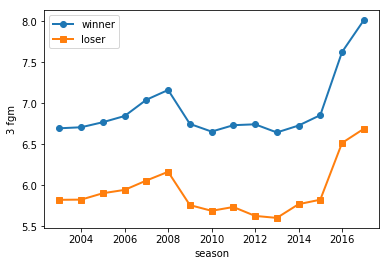

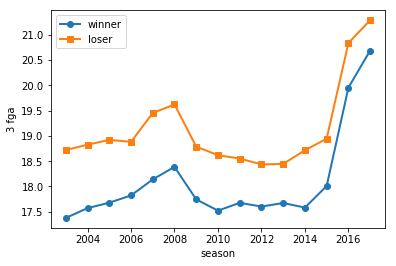

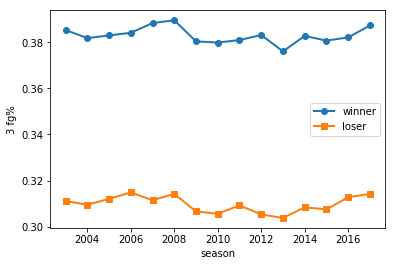

In [21]:

season_groupby = reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()
#literature review, problem statement clearer, clusters, properties 
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fga')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fg%')

Text(0,0.5,'fg%')

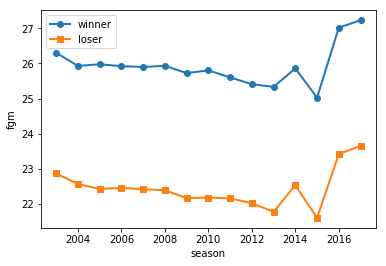

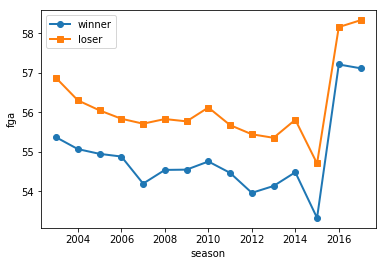

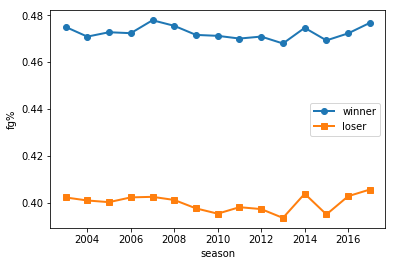

In [22]:
season_groupby = reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()
#literature review, problem statement clearer, clusters, properties 
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')

In [ ]:
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'] - season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'] - season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga'] - season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'] - season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fga')
plt.figure(2)
plt.plot(season_groupby['Season'], (season_groupby['Wfgm'] - season_groupby['Wfgm3'])/(season_groupby['Wfga'] - season_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], (season_groupby['Lfgm'] - season_groupby['Lfgm3'])/(season_groupby['Lfga'] - season_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fg%')

In [ ]:
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wscore'], label='data1', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lscore'], label='data2', lw=2, marker='s')

In [ ]:
%matplotlib inline
columns = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
for index, col in enumerate(columns):
    plt.figure(index)
    plt.plot(season_groupby['Season'], season_groupby['W' + col], label='winner', lw=2, marker='o')
    plt.plot(season_groupby['Season'], season_groupby['L' + col], label='loser', lw=2, marker='s')
    plt.legend(loc='best')
    plt.xlabel('season')
    plt.ylabel(col)
    
plt.figure(index + 1)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'] - season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'] - season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm2')
plt.figure(index + 2)
plt.plot(season_groupby['Season'], season_groupby['Wfga'] - season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'] - season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga2')
plt.figure(index + 3)
plt.plot(season_groupby['Season'], (season_groupby['Wfgm'] - season_groupby['Wfgm3'])/(season_groupby['Wfga'] - season_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], (season_groupby['Lfgm'] - season_groupby['Lfgm3'])/(season_groupby['Lfga'] - season_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%2')
plt.figure(index + 4)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(index + 5)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(index + 6)
plt.plot(season_groupby['Season'], season_groupby['Wftm']/season_groupby['Wfta'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lftm']/season_groupby['Lfta'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('ft%')

In [ ]:
%matplotlib inline
tournament_groupby = tourney_detailed_pd.groupby(['Season'], as_index=False).mean()
columns = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
for index, col in enumerate(columns):
    plt.figure(index)
    plt.plot(tournament_groupby['Season'], tournament_groupby['W' + col], label='winner', lw=2, marker='o')
    plt.plot(tournament_groupby['Season'], tournament_groupby['L' + col], label='loser', lw=2, marker='s')
    plt.legend(loc='best')
    plt.xlabel('season')
    plt.ylabel(col)
    
plt.figure(index + 1)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm'] - tournament_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm'] - tournament_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm2')
plt.figure(index + 2)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfga'] - tournament_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfga'] - tournament_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga2')
plt.figure(index + 3)
plt.plot(tournament_groupby['Season'], (tournament_groupby['Wfgm'] - tournament_groupby['Wfgm3'])/(tournament_groupby['Wfga'] - tournament_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], (tournament_groupby['Lfgm'] - tournament_groupby['Lfgm3'])/(tournament_groupby['Lfga'] - tournament_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%2')
plt.figure(index + 4)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm']/tournament_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm']/tournament_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(index + 5)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm3']/tournament_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm3']/tournament_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(index + 6)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wftm']/tournament_groupby['Wfta'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lftm']/tournament_groupby['Lfta'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('ft%')

In [859]:
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner regular season', color='green', lw=1, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm']/tournament_groupby['Wfga'], label='winner tournament', color='blue', lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser regular season', color='red', lw=1, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm']/tournament_groupby['Lfga'], label='winner tournament', color='orange', lw=1, marker='o')
plt.legend(loc='best')
plt.title('Fields Goal Percentage by Season')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goal Percentage by Season')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(3)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goals Made by Season')
plt.xlabel('season')
plt.ylabel('fgm3')
plt.figure(4)
plt.plot(season_groupby['Season'], season_groupby['Wfga3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goals Attempted by Season')
plt.xlabel('season')
plt.ylabel('fga3')

NameError: name 'season_groupby' is not defined

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

[-0.13004001 -0.10126264 -0.10887996 -0.16626104 -0.04747257 -0.06832987
  0.06376798 -0.03202689 -0.18014169 -0.01915025 -0.14401209 -0.17217244
 -0.11408871 -0.07398448 -0.11892743 -0.0645996  -0.1060048   0.05217105
 -0.03161336  0.01027214 -0.13395649 -0.03053455 -0.11930843 -0.05495066
  0.16436454  0.11379734 -0.16774686 -0.0656742  -0.01362312 -0.02463618
  0.02818375 -0.08493024 -0.02143269 -0.07116778 -0.09531533 -0.05797203
 -0.06000381 -0.11733151  0.01918715 -0.02370106]


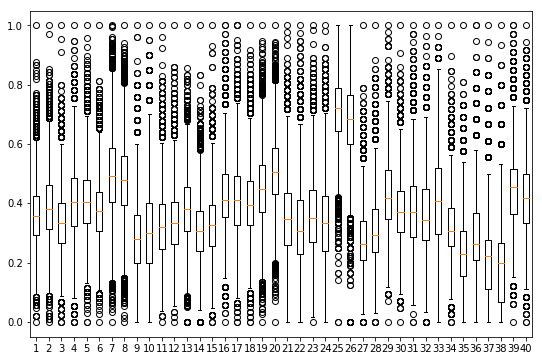

In [858]:
reg_season_detailed_years_pd = reg_season_detailed_pd[reg_season_detailed_pd['Season'].isin(['2017','2016','2015'])]
columns = ['score', 'fgm', 'fga', 'fg%', 'fgm3', 'fga3', 'fg%3', 'fgm2', 'fga2', 'fg%2',
           'ftm', 'fta', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
new_cols = []
for col in columns:
    new_cols.append("W" + col)
    new_cols.append("L" + col)
reg_season_detailed_years_pd['Wfgm2'] = reg_season_detailed_years_pd['Wfgm'] - reg_season_detailed_years_pd['Wfgm3']
reg_season_detailed_years_pd['Wfga2'] = reg_season_detailed_years_pd['Wfga'] - reg_season_detailed_years_pd['Wfga3']
reg_season_detailed_years_pd['Wfg%2'] = reg_season_detailed_years_pd['Wfgm2']/reg_season_detailed_years_pd['Wfga2']
reg_season_detailed_years_pd['Lfgm2'] = reg_season_detailed_years_pd['Lfgm'] - reg_season_detailed_years_pd['Lfgm3']
reg_season_detailed_years_pd['Lfga2'] = reg_season_detailed_years_pd['Lfga'] - reg_season_detailed_years_pd['Lfga3']
reg_season_detailed_years_pd['Lfg%2'] = reg_season_detailed_years_pd['Lfgm2']/reg_season_detailed_years_pd['Lfga2']
reg_season_detailed_years_pd['Wfg%'] = reg_season_detailed_years_pd['Wfgm']/reg_season_detailed_years_pd['Wfga']
reg_season_detailed_years_pd['Lfg%'] = reg_season_detailed_years_pd['Lfgm']/reg_season_detailed_years_pd['Lfga']
reg_season_detailed_years_pd['Wfg%3'] = reg_season_detailed_years_pd['Wfgm3']/reg_season_detailed_years_pd['Wfga3']
reg_season_detailed_years_pd['Lfg%3'] = reg_season_detailed_years_pd['Lfgm3']/reg_season_detailed_years_pd['Lfga3']
reg_season_detailed_years_pd['Wft%'] = reg_season_detailed_years_pd['Wftm']/reg_season_detailed_years_pd['Wfta']
reg_season_detailed_years_pd['Lft%'] = reg_season_detailed_years_pd['Lftm']/reg_season_detailed_years_pd['Lfta']
reg_season_detailed_years_pd = reg_season_detailed_years_pd.fillna(0)
x = reg_season_detailed_years_pd[new_cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

tournament_detailed_years_pd = tourney_detailed_pd[tourney_detailed_pd['Season'].isin(['2017','2016','2015'])]
columns = ['score', 'fgm', 'fga', 'fg%', 'fgm3', 'fga3', 'fg%3', 'fgm2', 'fga2', 'fg%2',
           'ftm', 'fta', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
new_cols = []
for col in columns:
    new_cols.append("W" + col)
    new_cols.append("L" + col)
tournament_detailed_years_pd['Wfgm2'] = tournament_detailed_years_pd['Wfgm'] - tournament_detailed_years_pd['Wfgm3']
tournament_detailed_years_pd['Wfga2'] = tournament_detailed_years_pd['Wfga'] - tournament_detailed_years_pd['Wfga3']
tournament_detailed_years_pd['Wfg%2'] = tournament_detailed_years_pd['Wfgm2']/tournament_detailed_years_pd['Wfga2']
tournament_detailed_years_pd['Lfgm2'] = tournament_detailed_years_pd['Lfgm'] - tournament_detailed_years_pd['Lfgm3']
tournament_detailed_years_pd['Lfga2'] = tournament_detailed_years_pd['Lfga'] - tournament_detailed_years_pd['Lfga3']
tournament_detailed_years_pd['Lfg%2'] = tournament_detailed_years_pd['Lfgm2']/tournament_detailed_years_pd['Lfga2']
tournament_detailed_years_pd['Wfg%'] = tournament_detailed_years_pd['Wfgm']/tournament_detailed_years_pd['Wfga']
tournament_detailed_years_pd['Lfg%'] = tournament_detailed_years_pd['Lfgm']/tournament_detailed_years_pd['Lfga']
tournament_detailed_years_pd['Wfg%3'] = tournament_detailed_years_pd['Wfgm3']/tournament_detailed_years_pd['Wfga3']
tournament_detailed_years_pd['Lfg%3'] = tournament_detailed_years_pd['Lfgm3']/tournament_detailed_years_pd['Lfga3']
tournament_detailed_years_pd['Wft%'] = tournament_detailed_years_pd['Wftm']/tournament_detailed_years_pd['Wfta']
tournament_detailed_years_pd['Lft%'] = tournament_detailed_years_pd['Lftm']/tournament_detailed_years_pd['Lfta']
tournament_detailed_years_pd = tournament_detailed_years_pd.fillna(0)
x_1 = tournament_detailed_years_pd[new_cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_1_scaled = min_max_scaler.fit_transform(x_1)

x_mean = np.mean(x_scaled, axis=0)
x_1_mean = np.mean(x_1_scaled, axis=0)
x_diff = x_mean - x_1_mean 
print(x_diff)
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(x_scaled)


In [ ]:
from pandas.tools.plotting import scatter_matrix
print(scaled_df)
scatter_matrix(scaled_df, alpha=0.2, figsize=(6, 6), diagonal='kde')